## Exploratory Data Analysis - Terrorism

In this notebook, we will perform EDA on 'Global Terrorism' dataset. The following two questions are answered:

1. As a security/defence analyst, try to find the hot zone of terrorism.
2. What all security issues and insights you can derive by EDA.

## Importing Libraries

In [2]:
# Importing all necessary libraries required in this notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [3]:
# Reading data from excel file

df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)
print("Data imported successfully")

df.head(10)

Data imported successfully


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


## Analysing Data

In [4]:
# Returns the dimensions of the dataset
print(f'The Shape of the DataFrame is: {df.shape}')
print(f'The number of rows in the DataFrame are: {df.shape[0]}')
print(f'The number of columns in the DataFrame are: {df.shape[1]}')

The Shape of the DataFrame is: (181691, 135)
The number of rows in the DataFrame are: 181691
The number of columns in the DataFrame are: 135


In [5]:
# Checking for missing values

df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Data Cleaning

We will rename few names of columns for better understanding purpose.

In [7]:
df= df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','natlty1_txt':'Nationality','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [8]:
df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


There are lot of columns in the dataset which are not very useful. Picking few columns for our EDA below.

In [9]:
terrorism_df = df[['Year','Month','Day','Country','Region','Attack_type','Target_type','Target_subtype','Nationality','Gang_name','Weapon_type','suicide','individual','nkill',]]

In [10]:
terrorism_df

,Year,Month,Day,Country,Region,Attack_type,Target_type,Target_subtype,Nationality,Gang_name,Weapon_type,suicide,individual,nkill
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,Unknown,0,0,1.0
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,Unknown,0,0,0.0
2,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,0,0,1.0
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Explosives,0,0,NaN
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Incendiary,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Armed Assault,Military,Military Checkpoint,Somalia,Al-Shabaab,Firearms,0,0,1.0
181687,2017,12,31,Syria,Middle East & North Africa,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russia,Muslim extremists,Explosives,0,0,2.0
181688,2017,12,31,Philippines,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0,0,0.0
181689,2017,12,31,India,South Asia,Bombing/Explosion,Government (General),Government Building/Facility/Office,India,Unknown,Explosives,0,0,0.0


In [14]:
terrorism_df.isna().sum()  #Checking for null values in the selected columns. We can see Target,_subtype, Nationality and nkill has missing values.

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Attack_type           0
Target_type           0
Target_subtype        0
Nationality        1559
Gang_name             0
Weapon_type           0
suicide               0
individual            0
nkill             10313
dtype: int64

In [15]:
## Filling NaN values in Target_subtype column as Others

terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')

C:\Users\Reshma Jawale\AppData\Local\Temp/ipykernel_22540/2877257057.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df['Target_subtype'] = terrorism_df['Target_subtype'].fillna('others')


In [16]:
terrorism_df['Target_subtype'].nunique()

113

In [17]:
terrorism_df.replace({"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)": "Vehicle"},inplace = True)

C:\Users\Reshma Jawale\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
terrorism_df.nunique()

Year                47
Month               13
Day                 32
Country            205
Region              12
Attack_type          9
Target_type         22
Target_subtype     113
Nationality        215
Gang_name         3537
Weapon_type         12
suicide              2
individual           2
nkill              205
dtype: int64

In [19]:
terrorism_df.duplicated().sum()

20375

In [20]:
terrorism_df.drop_duplicates()

,Year,Month,Day,Country,Region,Attack_type,Target_type,Target_subtype,Nationality,Gang_name,Weapon_type,suicide,individual,nkill
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,Unknown,0,0,1.0
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,Unknown,0,0,0.0
2,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,0,0,1.0
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Explosives,0,0,NaN
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Incendiary,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Armed Assault,Military,Military Checkpoint,Somalia,Al-Shabaab,Firearms,0,0,1.0
181687,2017,12,31,Syria,Middle East & North Africa,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russia,Muslim extremists,Explosives,0,0,2.0
181688,2017,12,31,Philippines,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0,0,0.0
181689,2017,12,31,India,South Asia,Bombing/Explosion,Government (General),Government Building/Facility/Office,India,Unknown,Explosives,0,0,0.0


In [21]:
# Returns the dimensions of the dataset
print(f'The Shape of the DataFrame after removing duplicates is: {terrorism_df.shape}')
print(f'The number of rows in the updated DataFrame are: {terrorism_df.shape[0]}')
print(f'The number of columns in the updated DataFrame are: {terrorism_df.shape[1]}')

The Shape of the DataFrame after removing duplicates is: (181691, 14)
The number of rows in the updated DataFrame are: 181691
The number of columns in the updated DataFrame are: 14


In [22]:
terrorism_df.dtypes

Year                int64
Month               int64
Day                 int64
Country            object
Region             object
Attack_type        object
Target_type        object
Target_subtype     object
Nationality        object
Gang_name          object
Weapon_type        object
suicide             int64
individual          int64
nkill             float64
dtype: object

In [23]:
terrorism_df.describe(include='object')

,Country,Region,Attack_type,Target_type,Target_subtype,Nationality,Gang_name,Weapon_type
count,181691,181691,181691,181691,181691,180132,181691,181691
unique,205,12,9,22,113,215,3537,12
top,Iraq,Middle East & North Africa,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Iraq,Unknown,Explosives
freq,24636,50474,88255,43511,11596,24113,82782,92426


In [24]:
terrorism_df.isna().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Attack_type           0
Target_type           0
Target_subtype        0
Nationality        1559
Gang_name             0
Weapon_type           0
suicide               0
individual            0
nkill             10313
dtype: int64

In [25]:
terrorism_df.columns.nunique()

14

In [26]:
Total_countries=terrorism_df['Country'].nunique()
print("Total %d countries were noted in the data"%Total_countries)

Total 205 countries were noted in the data


## Data Visualisation

Below violin plot shows most of the terrorism happened between the years 2010 and 2020.

<AxesSubplot:xlabel='Year'>

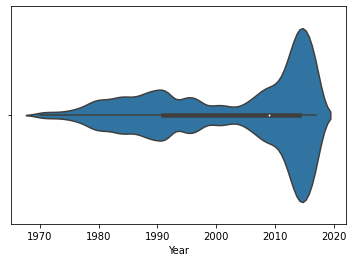

In [163]:
sns.violinplot(x=terrorism_df["Year"])

From the below chart we can see that Middle East & North Africa has recorded the highest number of terrorist attacks. 
Bombing/Explosion is the most common attack type used by terrorists.
The weapons that are most commonly used are Explosives.

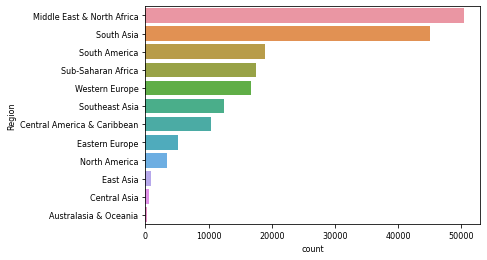

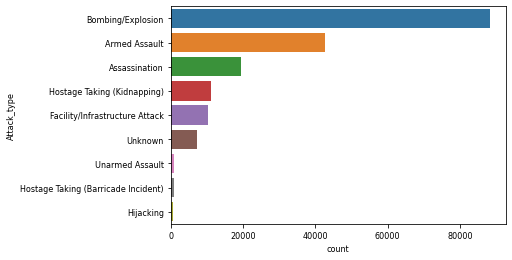

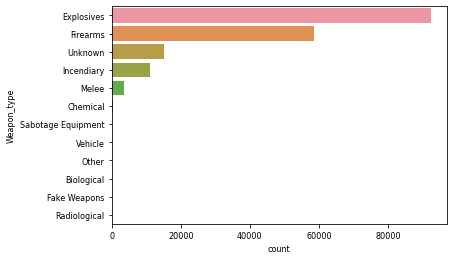

In [177]:
for column in terrorism_df.select_dtypes(include='object'):
    if terrorism_df[column].nunique() <= 12:
        sns.countplot(y=column, data=terrorism_df,order=terrorism_df[column].value_counts().sort_values(ascending=False).index)
        plt.show()

According to past data, the most common month in which terrorist attacks happened was May and July. The least happened in December.

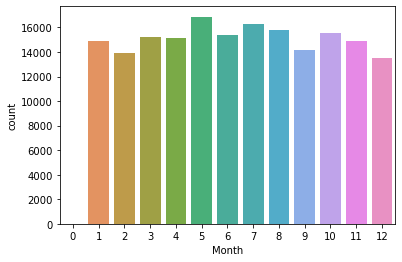

In [175]:
sns.countplot(x=terrorism_df.Month);

The country with the highest number of terrorist attacks is Iraq followed by Pakistan.

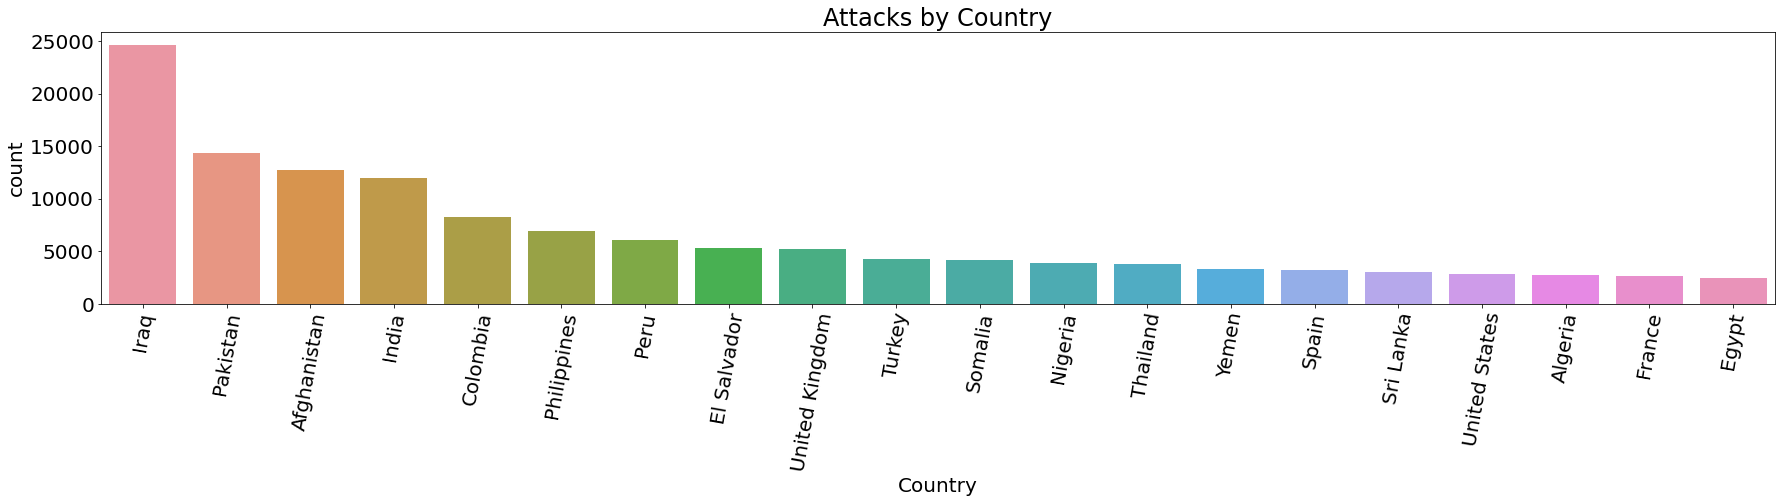

In [197]:
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':20});
plt.xticks(rotation = 80)
plt.title('Attacks by Country')
sns.countplot(x=terrorism_df.Country, order=terrorism_df.Country.value_counts().sort_values(ascending=False).iloc[:20].index);

The country with the least number of terrorism happening is Antigua and Barbuda, Vatican City and Falkland Islands.

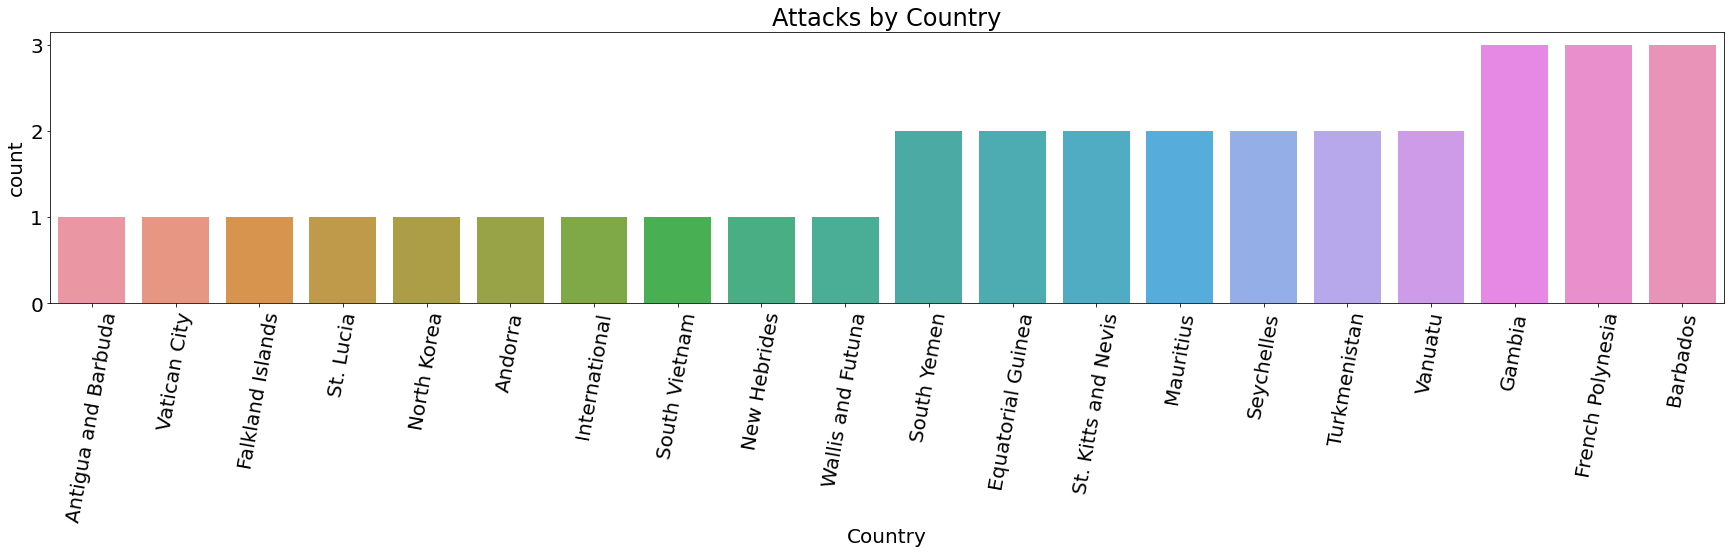

In [30]:
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':20});
plt.xticks(rotation = 80)
plt.title('Attacks by Country')
sns.countplot(x=terrorism_df.Country, order=terrorism_df.Country.value_counts().sort_values(ascending=True).iloc[:20].index);

In [31]:
terrorism_df

,Year,Month,Day,Country,Region,Attack_type,Target_type,Target_subtype,Nationality,Gang_name,Weapon_type,suicide,individual,nkill
0,1970,7,2,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,Unknown,0,0,1.0
1,1970,0,0,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,Unknown,0,0,0.0
2,1970,1,0,Philippines,Southeast Asia,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,Unknown,0,0,1.0
3,1970,1,0,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Explosives,0,0,NaN
4,1970,1,0,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,United States,Unknown,Incendiary,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Armed Assault,Military,Military Checkpoint,Somalia,Al-Shabaab,Firearms,0,0,1.0
181687,2017,12,31,Syria,Middle East & North Africa,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Russia,Muslim extremists,Explosives,0,0,2.0
181688,2017,12,31,Philippines,Southeast Asia,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0,0,0.0
181689,2017,12,31,India,South Asia,Bombing/Explosion,Government (General),Government Building/Facility/Office,India,Unknown,Explosives,0,0,0.0


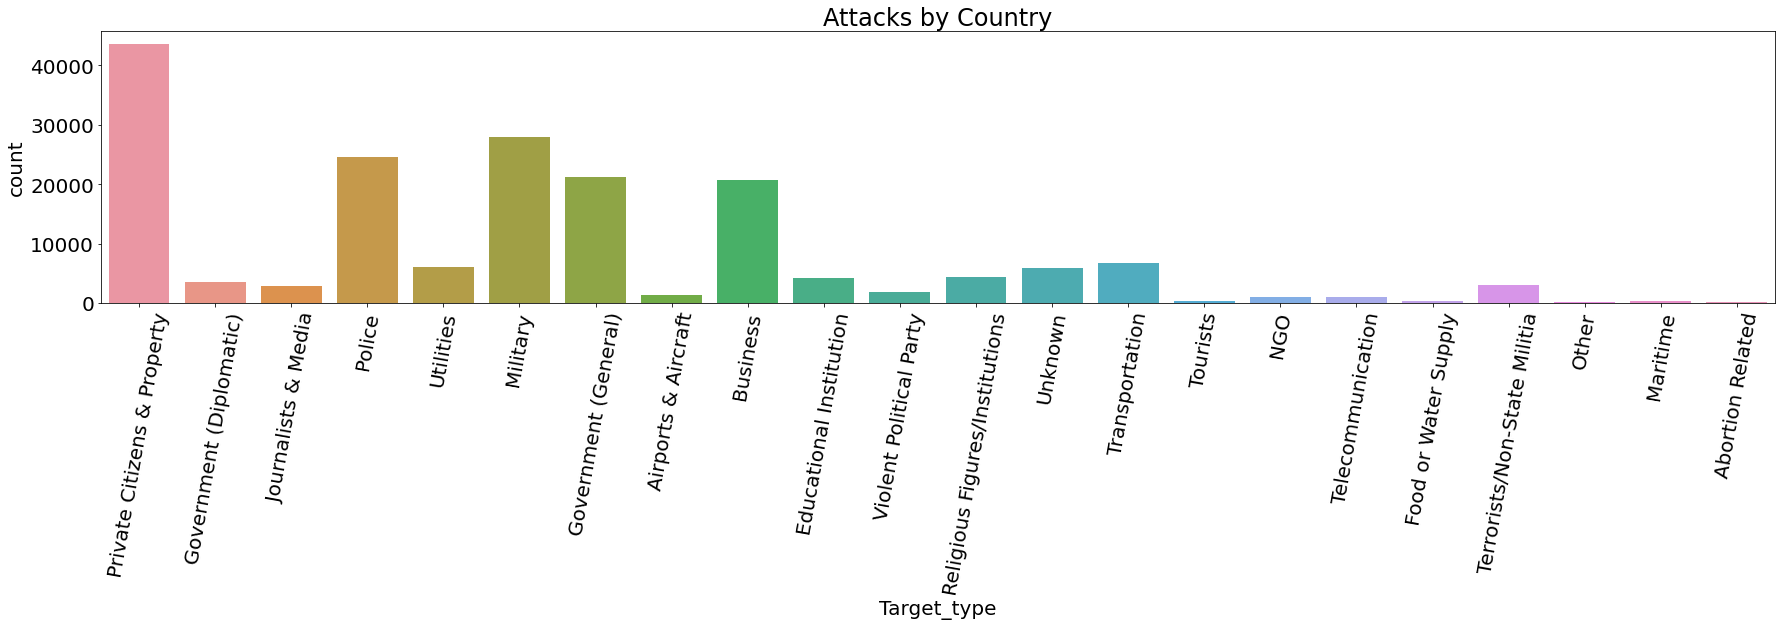

In [33]:
plt.figure(figsize=(30,5));
plt.rcParams.update({'font.size':20});
plt.xticks(rotation = 80)
plt.title('Attacks by Country')
sns.countplot(x=terrorism_df.Target_type);